# Preprocessing and Modelling (Clustering)

In this notebook, I apply three different clustering algorithms - KMeans, DBSCAN and Expectation-Maximization(EM), to the preprocessed data, and subsequently select the best model among these. 

**Contents:**
- [Imports](#Import-libraries-and-data)
- [Preprocessing](#Preprocessing)
- [KMeans](#KMeans)
- [DBSCAN](#Data-exploration)
- [Agglomerative Clustering](#Agglomerative-clustering)
- [Model Selection and Conclusion](#Model-Selection-and-Conclusion)
- [References](#References)

### Import libraries and data

In [100]:
#import libraries
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import sys
!{sys.executable} -m pip install plotly
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import iplot
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, PowerTransformer

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from itertools import product
from sklearn.metrics import silhouette_score
from prettytable import PrettyTable

%matplotlib inline

In [101]:
#import data
trx = pd.read_csv('../data/trx_clean.csv')
print("=================== Top 5 rows of dataset ===================")
display(trx.head())
print("=================== Shape of dataset ===================")
print(trx.shape)
print("=================== Data types in dataset ===================")
print(trx.dtypes)
print("=================== Description of data in dataset ===================")
display(trx.describe())

=================== Top 5 rows of dataset ===================


,sales,profit,shipping_cost,unit_price,monetary_value,quantity,discount,heavy_discount,heavy_discount_regions,non_profitable,non_profitable_regions,more_qty,more_qty_regions,recency,frequency,category_Furniture,category_Office Supplies,category_Technology,ship_mode_First Class,ship_mode_Same Day,ship_mode_Second Class,ship_mode_Standard Class,region_Canada,region_Caribbean,region_Central Africa,region_Central America,region_Central Asia,region_Central US,region_Eastern Africa,region_Eastern Asia,region_Eastern Europe,region_Eastern US,region_North Africa,region_Northern Europe,region_Oceania,region_South America,region_Southeastern Asia,region_Southern Africa,region_Southern Asia,region_Southern Europe,region_Southern US,region_Western Africa,region_Western Asia,region_Western Europe,region_Western US,segment_Consumer,segment_Corporate,segment_Home Office,market_Africa,market_Asia Pacific,market_Europe,market_LATAM,market_USCA,order_priority_Critical,order_priority_High,order_priority_Low,order_priority_Medium
0,221.980,62.1544,40.77,110.990,24644.6275,2,0.0,0,0,0,0,0,1,16,89,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,341.960,54.7136,25.27,170.980,24644.6275,2,0.0,0,0,0,0,0,1,16,89,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,48.712,5.4801,11.13,48.712,24644.6275,1,0.2,0,0,0,0,0,1,16,89,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
3,17.940,4.6644,4.29,5.980,24644.6275,3,0.0,0,0,0,0,1,1,16,89,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
4,12.624,-2.5248,1.97,6.312,24644.6275,2,0.2,0,0,1,0,0,1,16,89,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0


=================== Shape of dataset ===================
(48575, 57)
=================== Data types in dataset ===================
sales                       float64
profit                      float64
shipping_cost               float64
unit_price                  float64
monetary_value              float64
quantity                      int64
discount                    float64
heavy_discount                int64
heavy_discount_regions        int64
non_profitable                int64
non_profitable_regions        int64
more_qty                      int64
more_qty_regions              int64
recency                       int64
frequency                     int64
category_Furniture            int64
category_Office Supplies      int64
category_Technology           int64
ship_mode_First Class         int64
ship_mode_Same Day            int64
ship_mode_Second Class        int64
ship_mode_Standard Class      int64
region_Canada                 int64
region_Caribbean              int64
regio

,sales,profit,shipping_cost,unit_price,monetary_value,quantity,discount,heavy_discount,heavy_discount_regions,non_profitable,non_profitable_regions,more_qty,more_qty_regions,recency,frequency,category_Furniture,category_Office Supplies,category_Technology,ship_mode_First Class,ship_mode_Same Day,ship_mode_Second Class,ship_mode_Standard Class,region_Canada,region_Caribbean,region_Central Africa,region_Central America,region_Central Asia,region_Central US,region_Eastern Africa,region_Eastern Asia,region_Eastern Europe,region_Eastern US,region_North Africa,region_Northern Europe,region_Oceania,region_South America,region_Southeastern Asia,region_Southern Africa,region_Southern Asia,region_Southern Europe,region_Southern US,region_Western Africa,region_Western Asia,region_Western Europe,region_Western US,segment_Consumer,segment_Corporate,segment_Home Office,market_Africa,market_Asia Pacific,market_Europe,market_LATAM,market_USCA,order_priority_Critical,order_priority_High,order_priority_Low,order_priority_Medium
count,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.00000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000,48575.000000
mean,174.368493,18.852732,18.063502,55.579586,16390.883834,3.404653,0.143860,0.211282,0.080535,0.246217,0.080535,0.567844,0.865322,22.697581,67.211920,0.18244,0.628924,0.188636,0.144375,0.051302,0.200329,0.603994,0.007617,0.033742,0.012393,0.111539,0.004179,0.045805,0.014267,0.044900,0.029665,0.055708,0.025095,0.042738,0.067092,0.059002,0.060566,0.009038,0.050232,0.041132,0.031909,0.028224,0.048132,0.113495,0.063531,0.517694,0.301204,0.181101,0.089017,0.275100,0.227030,0.204282,0.204570,0.073248,0.301245,0.047597,0.577910
std,241.611565,80.216722,27.504931,70.156956,5015.224749,2.218692,0.212889,0.408222,0.272123,0.430811,0.272123,0.495381,0.341383,25.670098,13.389054,0.38621,0.483098,0.391223,0.351473,0.220616,0.400251,0.489071,0.086944,0.180565,0.110634,0.314801,0.064511,0.209065,0.118589,0.207086,0.169664,0.229359,0.156416,0.202268,0.250184,0.235630,0.238535,0.094637,0.218425,0.198598,0.175761,0.165615,0.214047,0.317200,0.243917,0.499692,0.458786,0.385106,0.284771,0.446569,0.418917,0.403180,0.403391,0.260545,0.458804,0.212913,0.493898
min,0.444000,-493.320000,1.002000,0.336000,1401.690240,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.280000,0.000000,2.470000,11.340000,12849.128500,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,58.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,77.670000,8.640000,7.100000,27.270000,15710.884260,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16

In [102]:
# apply permutations and combinations of features to obtain a set that provides interpretable clusters
trx_processed = trx.drop(columns = ['monetary_value','heavy_discount','non_profitable','more_qty_regions','recency','frequency','category_Furniture','category_Office Supplies', 'category_Technology','ship_mode_First Class', 'ship_mode_Same Day', 'ship_mode_Second Class','ship_mode_Standard Class', 'region_Canada', 'region_Caribbean','region_Central Africa', 'region_Central America','region_Central Asia', 'region_Central US', 'region_Eastern Africa','region_Eastern Asia', 'region_Eastern Europe', 'region_Eastern US','region_North Africa', 'region_Northern Europe', 'region_Oceania','region_South America', 'region_Southeastern Asia','region_Southern Africa', 'region_Southern Asia','region_Southern Europe', 'region_Southern US', 'region_Western Africa','region_Western Asia', 'region_Western Europe', 'region_Western US','segment_Consumer', 'segment_Corporate', 'segment_Home Office','market_Africa', 'market_Asia Pacific', 'market_Europe', 'market_LATAM','market_USCA', 'order_priority_Critical', 'order_priority_High','order_priority_Low', 'order_priority_Medium'])

### Preprocessing
As KMeans is a distance-based algorithm, it is important to scale the variables. Omly scale numerical variables as it does not make sense to scale categorical variables which have already been one-hot-encoded to 0 or 1. 

In [103]:
# separate numerical from categorical variables
trx_num = trx_processed[trx_processed.columns[:6]]
trx_cat = trx_processed[trx_processed.columns[6:]]
# display 
print("=================== Top 5 rows of numerical dataset ===================")
display(trx_num.head())
print("=================== Top 5 rows of categorical dataset ===================")
display(trx_cat.head())

=================== Top 5 rows of numerical dataset ===================


,sales,profit,shipping_cost,unit_price,quantity,discount
0,221.980,62.1544,40.77,110.990,2,0.0
1,341.960,54.7136,25.27,170.980,2,0.0
2,48.712,5.4801,11.13,48.712,1,0.2
3,17.940,4.6644,4.29,5.980,3,0.0
4,12.624,-2.5248,1.97,6.312,2,0.2


=================== Top 5 rows of categorical dataset ===================


,heavy_discount_regions,non_profitable_regions,more_qty
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,1
4,0,0,0


In [104]:
# scale numerical variables
mms = MinMaxScaler(feature_range = (0,1))
trx_num_ss = mms.fit_transform(trx_num)
#convert to df 
trx_num_ss = pd.DataFrame(trx_num_ss, columns = trx_num.columns) 

In [105]:
trx_num_ss.head()

,sales,profit,shipping_cost,unit_price,quantity,discount
0,0.129728,0.532645,0.201850,0.268696,0.076923,0.00
1,0.199986,0.525510,0.123177,0.414367,0.076923,0.00
2,0.028265,0.478300,0.051406,0.117469,0.000000,0.25
3,0.010245,0.477518,0.016689,0.013705,0.153846,0.00
4,0.007132,0.470624,0.004913,0.014511,0.076923,0.25


In [112]:
# merge with categorical var
trx_processed = pd.concat([trx_num_ss, trx_cat], axis=1)
#preview data 
trx_processed.head()

,sales,profit,shipping_cost,unit_price,quantity,discount,heavy_discount_regions,non_profitable_regions,more_qty
0,1.129728,1.532645,1.201850,1.268696,1.076923,1.00,0,0,0
1,1.199986,1.525510,1.123177,1.414367,1.076923,1.00,0,0,0
2,1.028265,1.478300,1.051406,1.117469,1.000000,1.25,0,0,0
3,1.010245,1.477518,1.016689,1.013705,1.153846,1.00,0,0,1
4,1.007132,1.470624,1.004913,1.014511,1.076923,1.25,0,0,0


### KMeans

Find the optimal number of clusters using the elbow method.

In [113]:
%%time
scores = []
range_n_clusters = range(2,11) #run model on 2 clusters up to 20 clusters
for cluster in range_n_clusters:
    km = KMeans(n_clusters = cluster, max_iter = 50) 
    km.fit(trx_processed)
    inertia = km.inertia_ # evaluates how dense the cluster is
    sil = silhouette_score(trx_processed, km.labels_) # metric to evaluate how far apart clusters are
    scores.append([cluster, inertia, sil])
# create dataframe to visualise the scores   
scores_df = pd.DataFrame(scores)
scores_df.columns = ['k', 'inertia', 'silhouette']

Wall time: 2min 46s


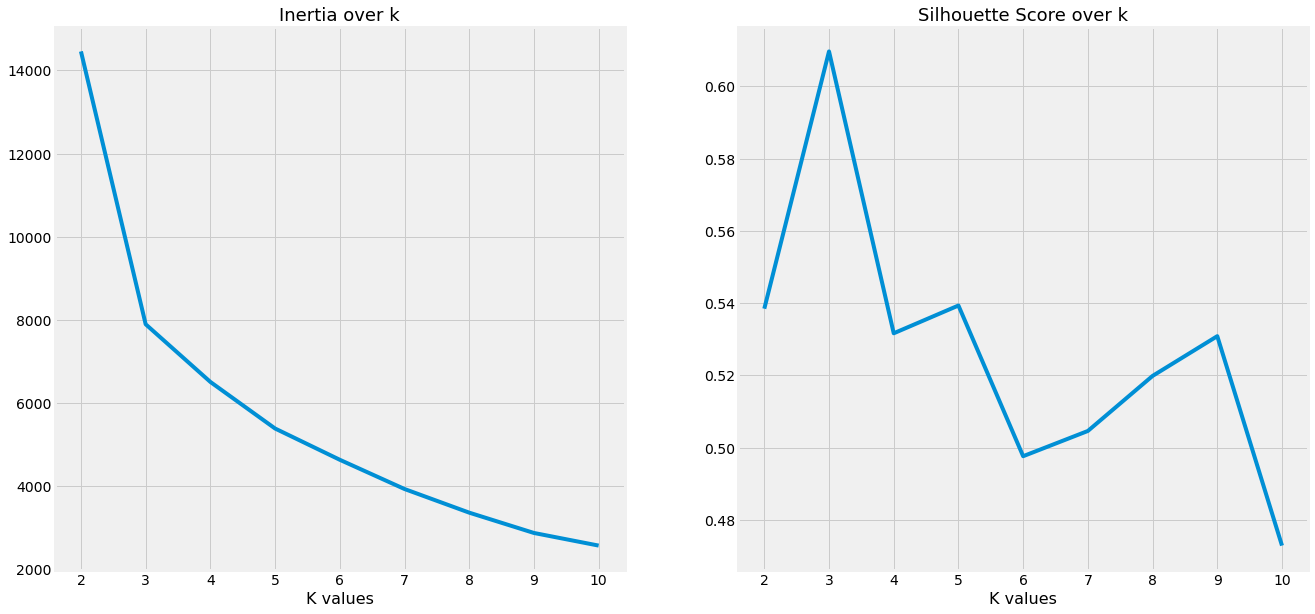

In [114]:
# plot the inertia and silhouette score across all k values stated
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].plot(scores_df.k, scores_df.inertia)
axes[0].set_title('Inertia over k', fontsize = 18)
axes[0].set_xlabel('K values', fontsize = 16)
axes[0].set_xticks(range(2,11))
axes[0].tick_params(axis = 'x', labelsize=14)
axes[0].tick_params(axis = 'y', labelsize=14)
axes[1].plot(scores_df.k, scores_df.silhouette)
axes[1].set_title('Silhouette Score over k', fontsize = 18)
axes[1].set_xlabel('K values', fontsize = 16)
axes[1].set_xticks(range(2,11))
axes[1].tick_params(axis = 'x', labelsize=14)
axes[1].tick_params(axis = 'y', labelsize=14)
plt.show()

- Optimal cluster at 3, which has the highest silhouette score of 0.61
- Using the 'elbow' method, there is a slight kink at 3 clusters

In [75]:
# visualise clusters in flattened graph
def km_viz(df, n_cluster):
    km = KMeans(n_clusters = n_cluster)
    km.fit(df)
    #get cluster labels
    cluster_labels = km.labels_
    #append labels to df
    df_new = df.assign(cluster = cluster_labels)
    #initialise TSNE
    model = TSNE()
    trf = model.fit_transform(df_new)
    #plot
    plt.title(f'Flattened graph of {n_cluster} Clusters')
    sns.scatterplot(x = trf[:,0], y = trf[:,1], hue = cluster_labels, style = cluster_labels, palette = "colorblind")

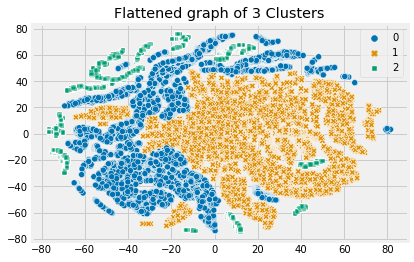

In [76]:
km_viz(trx_processed, 3)

In [78]:
# based on selected number of clusters, assign cluster labesl to original dataframe 
km = KMeans(n_clusters = 3, max_iter = 50) 
km.fit(trx_processed)
# get cluster labels
cluster_labels = km.labels_
# append cluster labels to original df
trx_km = trx.copy()
trx_km = trx_km.assign(cluster = cluster_labels)
# print silhouette score 
print("=================== Silhouette Score ===================")
print(silhouette_score(trx_processed, km.labels_))
#preview df 
print("=================== Final dataframe ===================")
display(trx_km.head())

=================== Silhouette Score ===================
0.6096384008344289
=================== Final dataframe ===================


,sales,profit,shipping_cost,unit_price,quantity,discount,heavy_discount_regions,non_profitable_regions,more_qty,cluster
0,221.980,62.1544,40.77,110.990,2,0.0,0,0,0,0
1,341.960,54.7136,25.27,170.980,2,0.0,0,0,0,0
2,48.712,5.4801,11.13,48.712,1,0.2,0,0,0,0
3,17.940,4.6644,4.29,5.980,3,0.0,0,0,1,1
4,12.624,-2.5248,1.97,6.312,2,0.2,0,0,0,0


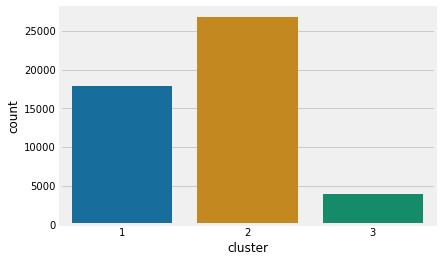

In [79]:
# view numbers in each cluster
sns.countplot(trx_km.cluster, palette = 'colorblind')
plt.xticks(ticks =[0,1,2],labels = ['1','2','3'])
plt.show()

- Data is not evenly spread out across clusters. Not an issue as K-means algorithm does not assume an equal number of points in each cluster (Azim, 2018).

In [80]:
#view how each clusters differs across features
def barplot_clusters(data):
    '''function that plots features against cluster labels'''
    for i in data.columns:
        sns.barplot(data = data, x = 'cluster', y = i, ci = None)
        plt.xticks(ticks =[0,1,2],labels = ['1','2','3'])
        plt.show()

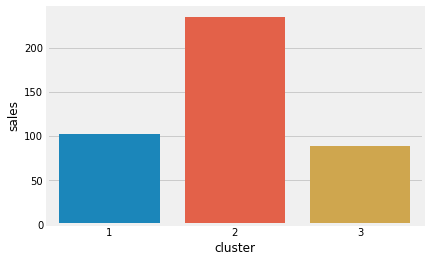

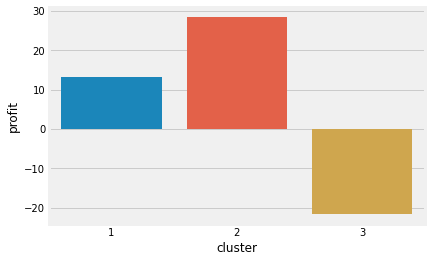

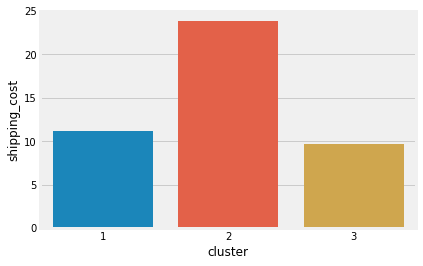

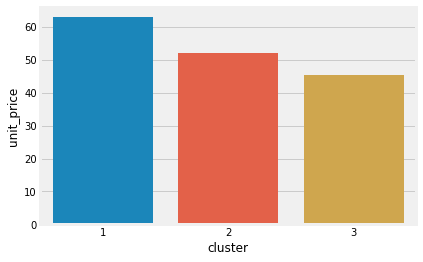

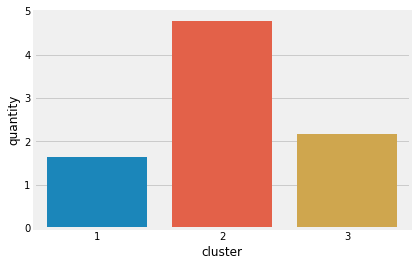

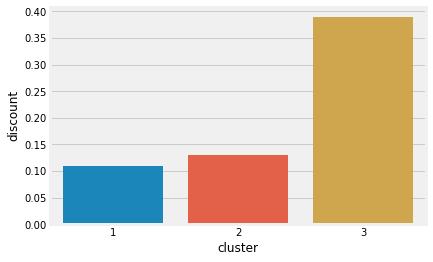

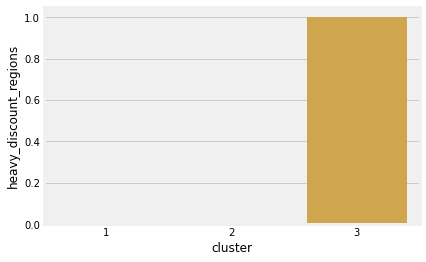

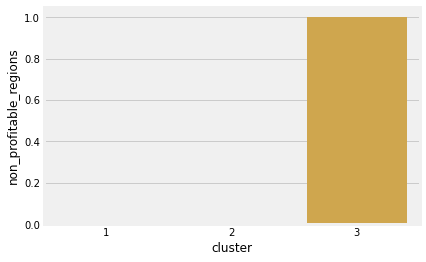

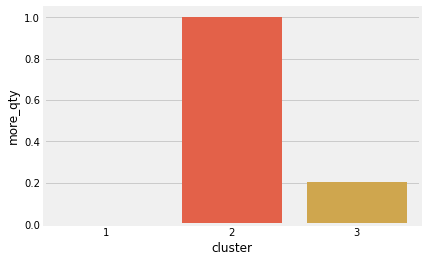

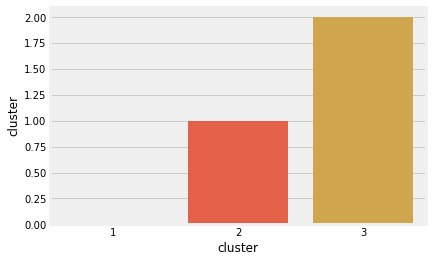

In [81]:
barplot_clusters(trx_km)

In [82]:
# view mean vlaues by cluster
stats_cluster = trx_km.groupby('cluster').mean()
stats_cluster.head()

,sales,profit,shipping_cost,unit_price,quantity,discount,heavy_discount_regions,non_profitable_regions,more_qty
cluster,,,,,,,,,
0,102.411667,13.277655,11.252126,62.971468,1.634105,0.110482,0.0,0.0,0.000000
1,234.862067,28.493625,23.827334,52.126854,4.767106,0.130298,0.0,0.0,1.000000
2,88.886374,-21.694546,9.714632,45.449921,2.164366,0.389238,1.0,1.0,0.202965


- There are some distinct features between the clusters. 


| Feature | **Cluster 2** | **Cluster 1** | **Cluster 3** |
| :----: | :-------- | :-------- | :------- |
| Sales | Highest sales compared to other clusters with mean of about USD250 | Average sales of USD100 | Average sales of ~USD80 |
| Profit | Most profitable cluster | Half as profitable cluster | Non-profitable cluster |
| Shipping Cost | Highest shipping cost imposed | Half the shipping cost as Cluster 1 | About half the shipping cost as Cluster 1 or lesser |
| Quantity | Highest quantity purchased | Lower average quantity at about 1-2 | Lower average quantity purchased at about 2|
| Discount | Relatively low discount average at about 0.1% | Similar to Cluster 1 | Huge discounts >0.3% |
| Presence of heavy discounts | None | None | Heavy discounts |
| Profitable? | Profitable | Profitable | Non-profitable |



### DBSCAN

Density-Based Spatial Clustering of Application with Noise (DBSCAN) is well-suited for clustering data with minimal domain knowledge (unlike iterating for best value of `k` in Kmeans), discovering clusters with arbitrary shapes and efficient on large databases. 

It takes on two parameters, epsilon (eps) and minimum samples (min_samples), which we can determine the optimal values (Maklin, 2019) using nearest neighbours.

In [83]:
# instantiate and fit nearest neighbours
nn = NearestNeighbors(n_neighbors = 2)
nn = nn.fit(trx_processed)
distances, indices = nn.kneighbors(trx_processed)

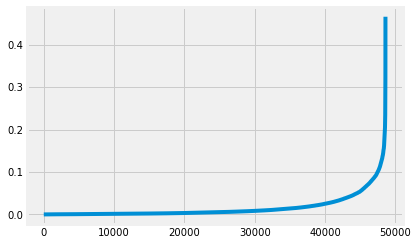

In [84]:
# plot results 
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

- Optimal value of eps is at point of maximum curvature, in this case, 0.1 

<u>Run DBSCAN based on optimal eps value</u>

In [85]:
%%time
# create params for minimum samples
min_samples = [30, 100, 500, 1000, 3000]
# create table 
x = PrettyTable(title = 'Silhouette Score on parameters and clusters', header_style = 'title', max_table_width = 110)
x.field_names = ['Number of Clusters', 'Param - Minimum Samples', 'Silhouette Score']
for i in min_samples:
    dbscan = DBSCAN(eps=0.1, min_samples = i)
    dbscan.fit(trx_processed) #fit
    x.add_row([len(np.unique(dbscan.labels_)), i, round(silhouette_score(trx_processed, dbscan.labels_),3)])
#print table with scores
print(x)

+-----------------------------------------------------------------+
|           Silhouette Score on parameters and clusters           |
+--------------------+-------------------------+------------------+
| Number Of Clusters | Param - Minimum Samples | Silhouette Score |
+--------------------+-------------------------+------------------+
|         17         |            30           |      0.333       |
|         16         |           100           |      0.232       |
|         10         |           500           |      0.178       |
|         7          |           1000          |      0.088       |
|         3          |           3000          |      0.037       |
+--------------------+-------------------------+------------------+
Wall time: 2min 4s


- DBSCAN does not seem to work well on this data. From the silhouette scores above, there doesn't seem to be a decent distance between clusters, when compared with Kmeans.

### Agglomerative Clustering
Groups objects based on their similarity. It works in a "bottom-up" manner whereby each object is initially considered as a single element cluster (leaf). At each step of the algorithm, the two clusters that are the most similar are combined into a new bigger cluster (nodes). This process is repeated until all points are a member of a single big cluster (Datanovia, n.d.)

In [86]:
%%time
scores = []
range_n_clusters = range(2,11) #run model on 2 clusters up to 20 clusters
y = PrettyTable(title = 'Silhouette Score on Clusters', header_style = 'title', max_table_width = 110)
y.field_names = ['Number of Clusters', 'Silhouette Score']
for cluster in range_n_clusters:
    agglo = AgglomerativeClustering(n_clusters = cluster) 
    agglo.fit(trx_processed)
    y.add_row([cluster, round(silhouette_score(trx_processed, agglo.labels_),4)])
#print table with scores
print(y)

+---------------------------------------+
|      Silhouette Score on Clusters     |
+--------------------+------------------+
| Number Of Clusters | Silhouette Score |
+--------------------+------------------+
|         2          |      0.532       |
|         3          |       0.61       |
|         4          |       0.5        |
|         5          |      0.519       |
|         6          |       0.48       |
|         7          |      0.487       |
|         8          |      0.486       |
|         9          |      0.497       |
|         10         |      0.449       |
+--------------------+------------------+
Wall time: 13min 30s


- Best silhouette score of 0.696 at 3 clusters.

In [88]:
# based on selected number of clusters, assign cluster labels to original dataframe 
agglo = AgglomerativeClustering(n_clusters = 3) 
agglo.fit(trx_processed)
# get cluster labels
cluster_labels = agglo.labels_
# append cluster labels to original df
trx_agglo = trx.copy()
trx_agglo = trx_agglo.assign(cluster = cluster_labels)
# print silhouette score 
print("=================== Silhouette Score ===================")
print(silhouette_score(trx_processed, agglo.labels_))
#preview df 
print("=================== Final dataframe ===================")
display(trx_agglo.head())

=================== Silhouette Score ===================
0.6096384008344289
=================== Final dataframe ===================


,sales,profit,shipping_cost,unit_price,quantity,discount,heavy_discount_regions,non_profitable_regions,more_qty,cluster
0,221.980,62.1544,40.77,110.990,2,0.0,0,0,0,1
1,341.960,54.7136,25.27,170.980,2,0.0,0,0,0,1
2,48.712,5.4801,11.13,48.712,1,0.2,0,0,0,1
3,17.940,4.6644,4.29,5.980,3,0.0,0,0,1,0
4,12.624,-2.5248,1.97,6.312,2,0.2,0,0,0,1


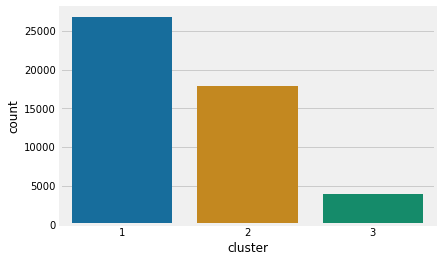

In [89]:
# view numbers in each cluster
sns.countplot(trx_agglo.cluster, palette = 'colorblind')
plt.xticks(ticks =[0,1,2],labels = ['1','2','3'])
plt.show()

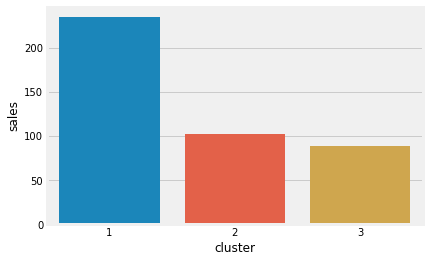

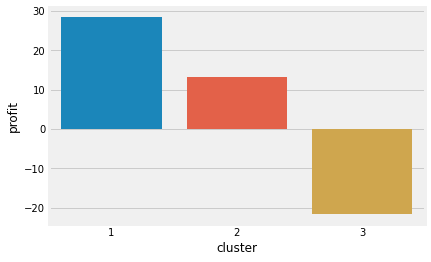

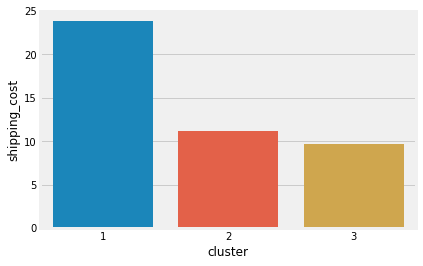

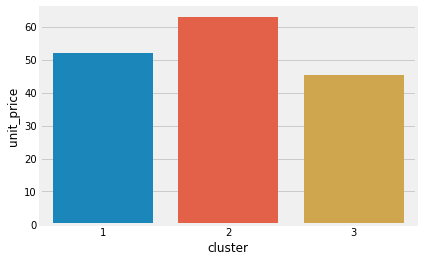

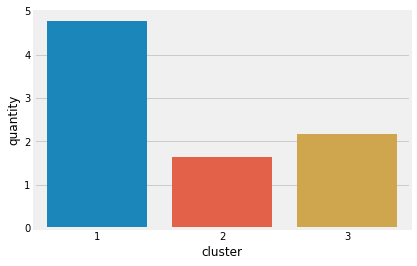

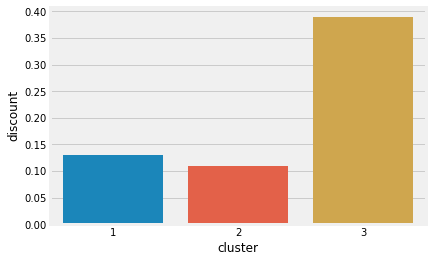

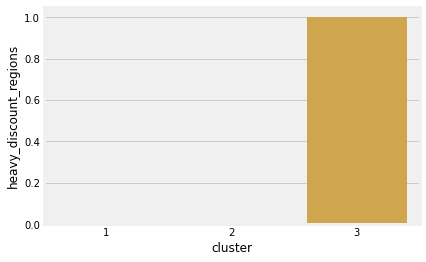

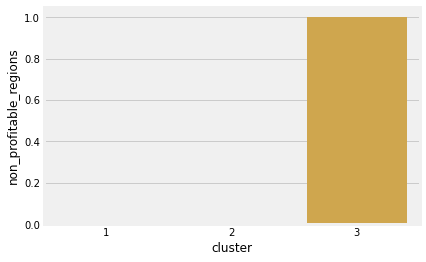

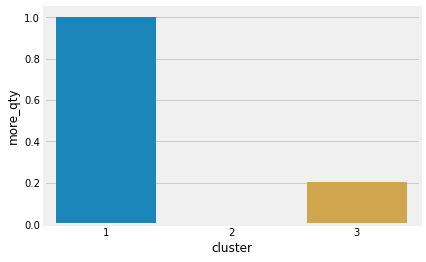

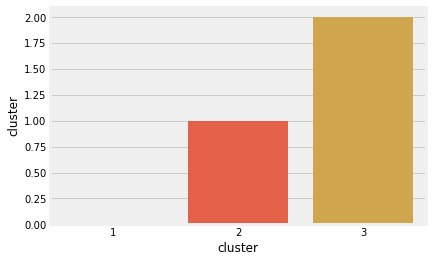

In [90]:
barplot_clusters(trx_agglo)

In [91]:
# view mean values by cluster
stats_agglo = trx_agglo.groupby('cluster').mean()
stats_agglo.head()

,sales,profit,shipping_cost,unit_price,quantity,discount,heavy_discount_regions,non_profitable_regions,more_qty
cluster,,,,,,,,,
0,234.862067,28.493625,23.827334,52.126854,4.767106,0.130298,0.0,0.0,1.000000
1,102.411667,13.277655,11.252126,62.971468,1.634105,0.110482,0.0,0.0,0.000000
2,88.886374,-21.694546,9.714632,45.449921,2.164366,0.389238,1.0,1.0,0.202965


- Results are very close to kmeans results

### Model Selection and Conclusion 

Between the three models, **DBSCAN** performed the worst. This is probably due to the higher dimensions of the dataset and the datapoints are not density-based. **KMeans** and **Agglomerative Clustering** performed better on the dataset, with the best scores on both models being 3 clusters formed. Agglomerative Clustering returned a higher silhouette score of 0.696, compared to KMeans at 0.601. For this, the selected production model is Agglomerative Clustering. 

In [96]:
trx['cluster'] = trx_agglo['cluster']

In [97]:
trx.head()

,sales,profit,shipping_cost,unit_price,monetary_value,quantity,discount,heavy_discount,heavy_discount_regions,non_profitable,non_profitable_regions,more_qty,more_qty_regions,recency,frequency,category_Furniture,category_Office Supplies,category_Technology,ship_mode_First Class,ship_mode_Same Day,ship_mode_Second Class,ship_mode_Standard Class,region_Canada,region_Caribbean,region_Central Africa,region_Central America,region_Central Asia,region_Central US,region_Eastern Africa,region_Eastern Asia,region_Eastern Europe,region_Eastern US,region_North Africa,region_Northern Europe,region_Oceania,region_South America,region_Southeastern Asia,region_Southern Africa,region_Southern Asia,region_Southern Europe,region_Southern US,region_Western Africa,region_Western Asia,region_Western Europe,region_Western US,segment_Consumer,segment_Corporate,segment_Home Office,market_Africa,market_Asia Pacific,market_Europe,market_LATAM,market_USCA,order_priority_Critical,order_priority_High,order_priority_Low,order_priority_Medium,cluster
0,221.980,62.1544,40.77,110.990,24644.6275,2,0.0,0,0,0,0,0,1,16,89,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
1,341.960,54.7136,25.27,170.980,24644.6275,2,0.0,0,0,0,0,0,1,16,89,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
2,48.712,5.4801,11.13,48.712,24644.6275,1,0.2,0,0,0,0,0,1,16,89,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1
3,17.940,4.6644,4.29,5.980,24644.6275,3,0.0,0,0,0,0,1,1,16,89,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0
4,12.624,-2.5248,1.97,6.312,24644.6275,2,0.2,0,0,1,0,0,1,16,89,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [98]:
# save data with clusters from agglomerative clustering to raw clean data in prep for regression
trx.to_csv("../data/trx_clustered.csv", index = False)

### References

RFM analysis explanation. 
https://www.dbmarketing.com/articles/Art149.htm

"Is it true that K-Means has an assumption “each cluster has a roughly equal number of observations”?" (Azim, 2018)
https://stats.stackexchange.com/questions/326685/is-it-true-that-k-means-has-an-assumption-each-cluster-has-a-roughly-equal-numb

"DBSCAN Python Example: The Optimal Value For Epsilon (EPS)" (Maklin, 2019)
https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

"Agglomerative Hierarchical Clustering"(Datanovia, n.d.)
https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/